This kernel uses data from [Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/overview)

In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.utils.data
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


First we import data from csv file and split it into 3 groups: training, testing, validation

In [151]:
# read data
all_data = pd.read_csv("../input/fer2013.csv")

In [152]:
# split to 3 parts
groups = [g for _, g in all_data.groupby('Usage')]
training_data = groups[2]
testing_data = groups[1]
validation_data = groups[0]

In [153]:
res = np.array([np.fromstring(image, np.uint8, sep=' ') for image in testing_data['pixels']])
res = res.reshape(res.shape[0], 48, 48)
res.shape

(3589, 48, 48)

Second, we process groups to transform Dataframes to DataLoader and to reshape images array from 1D to 2D:

In [154]:
label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def make_dataloader(data, batch_size, shuffle):
    images, labels = data['pixels'], data['emotion']
    images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in images])
    images = images.reshape(images.shape[0], 48, 48)
    dataset = torch.utils.data.TensorDataset(torch.Tensor(images), torch.Tensor(np.array(labels)).int())
    return torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle)

train_loader = make_dataloader(training_data, 100, True)
test_loader = make_dataloader(testing_data, 100, True)
valid_loader = make_dataloader(validation_data, 100, False)



Let's look at data:

Happy


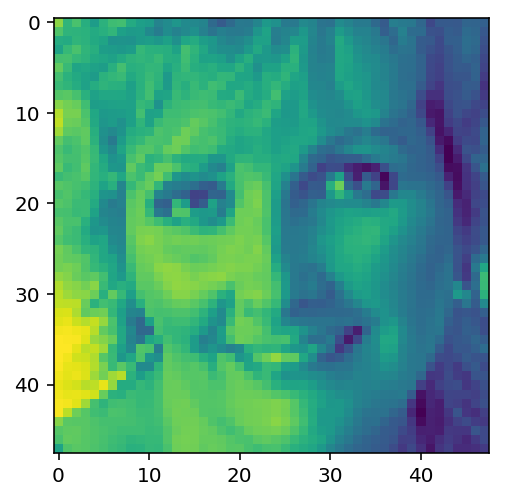

In [155]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(label_names[labels[1]])
plt.imshow(images[1]);